In [0]:
#revisar el contenido de cada columna
import pandas as pd

df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Ver las columnas del DataFrame
display(df.columns)

Index(['id_anuncio', 'nombre_anuncio', 'adset_name', 'nombre_campana',
       'fecha_inicio', 'fecha_finalizacion', 'personas_alcanzadas',
       'veces_mostrado', 'promedio_frecuencia', 'gasto', 'clicks_en_anuncio',
       'conversion_mercado', 'costo_por_resultado',
       'costo_por_mil_impresiones', 'calidad_mercado', 'tipo_compra',
       'click_enlace_trafico', 'costo_por_click_anuncio', 'interaccion_post',
       'interaccion_page', 'vistas_video', 'conversion_boton_msj',
       'conversion_primer_respuesta', 'comentarios', '3er_msj_cliente',
       '2do_msj_cliente', 'like', 'msj_iniciado_por_cliente_ultimos_7Dias',
       'reacciones_post', 'click_link', 'contenido_publicado',
       'vistas_mensaje_bienvenida', 'contenido_guardado'],
      dtype='object')

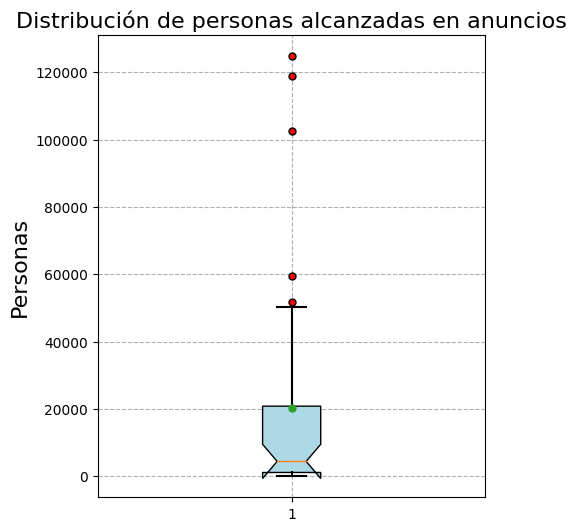

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  personas_alcanzadas
27                          Test_Ad_SoloLikesFb_Arqui               124737
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado               118865
8                  Test_Ad_Amenidades_Video_Altavista               102498
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                59561
28               Test_Ad_Ultimas88_Altavista_Mejorado                51909


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'personas_alcanzadas'
df_sorted = df_grouped.sort_values(by='personas_alcanzadas', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['personas_alcanzadas'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de personas alcanzadas en anuncios', fontsize=16)
plt.ylabel('Personas', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['personas_alcanzadas'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['personas_alcanzadas'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['personas_alcanzadas'].quantile(0.25)
q3 = df_sorted['personas_alcanzadas'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más personas_alcanzadas por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['personas_alcanzadas'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'personas_alcanzadas']])

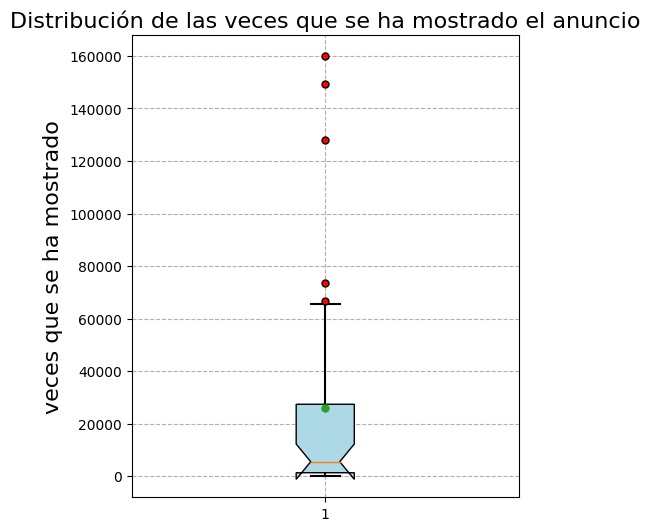

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  veces_mostrado
27                          Test_Ad_SoloLikesFb_Arqui          159864
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado          149499
8                  Test_Ad_Amenidades_Video_Altavista          128058
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...           73505
28               Test_Ad_Ultimas88_Altavista_Mejorado           66723


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'veces_mostrado'
df_sorted = df_grouped.sort_values(by='veces_mostrado', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['veces_mostrado'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de las veces que se ha mostrado el anuncio', fontsize=16)
plt.ylabel('veces que se ha mostrado', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['veces_mostrado'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['veces_mostrado'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['veces_mostrado'].quantile(0.25)
q3 = df_sorted['veces_mostrado'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más veces_mostrado por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['veces_mostrado'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'veces_mostrado']])

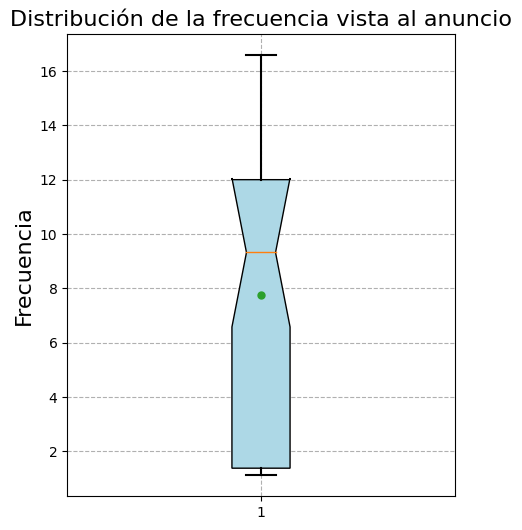

Anuncios con su valor fuera del rango (outliers):
Empty DataFrame
Columns: [nombre_anuncio, promedio_frecuencia]
Index: []


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'promedio_frecuencia'
df_sorted = df_grouped.sort_values(by='promedio_frecuencia', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['promedio_frecuencia'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de la frecuencia vista al anuncio', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['promedio_frecuencia'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['promedio_frecuencia'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['promedio_frecuencia'].quantile(0.25)
q3 = df_sorted['promedio_frecuencia'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más promedio_frecuencia por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['promedio_frecuencia'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'promedio_frecuencia']])

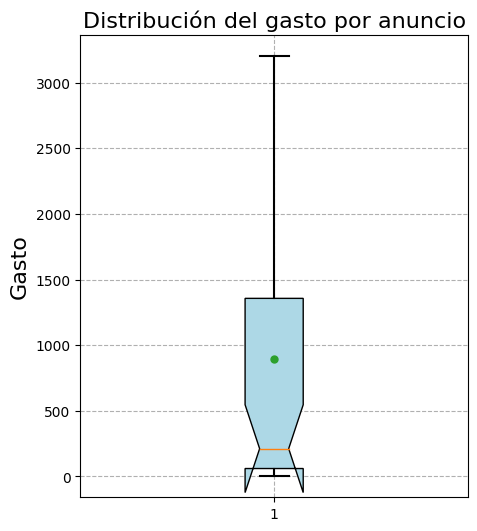

Anuncios con su valor fuera del rango (outliers):
Empty DataFrame
Columns: [nombre_anuncio, gasto]
Index: []


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'gasto'
df_sorted = df_grouped.sort_values(by='gasto', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['gasto'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución del gasto por anuncio', fontsize=16)
plt.ylabel('Gasto', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['gasto'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['gasto'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['gasto'].quantile(0.25)
q3 = df_sorted['gasto'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más gasto por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['gasto'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'gasto']])

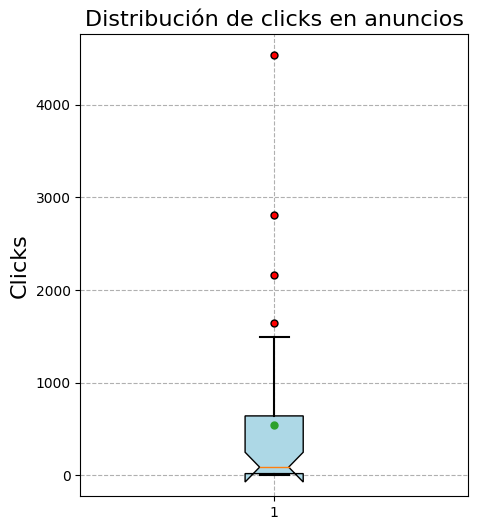

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  clicks_en_anuncio
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado               4534
27                          Test_Ad_SoloLikesFb_Arqui               2812
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...               2160
28               Test_Ad_Ultimas88_Altavista_Mejorado               1647


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'clicks_en_anuncio'
df_sorted = df_grouped.sort_values(by='clicks_en_anuncio', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['clicks_en_anuncio'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de clicks en anuncios', fontsize=16)
plt.ylabel('Clicks', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['clicks_en_anuncio'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['clicks_en_anuncio'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['clicks_en_anuncio'].quantile(0.25)
q3 = df_sorted['clicks_en_anuncio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más clicks_en_anuncio por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['clicks_en_anuncio'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'clicks_en_anuncio']])

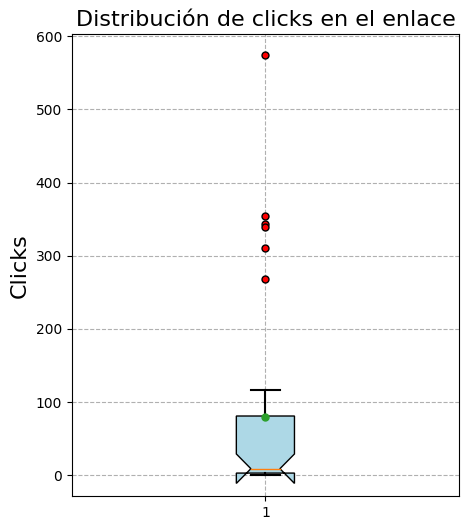

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  click_enlace_trafico
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado                 574.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante                 354.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante                 344.0
8                  Test_Ad_Amenidades_Video_Altavista                 339.0
28               Test_Ad_Ultimas88_Altavista_Mejorado                 310.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                 268.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'click_enlace_trafico'
df_sorted = df_grouped.sort_values(by='click_enlace_trafico', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['click_enlace_trafico'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de clicks en el enlace', fontsize=16)
plt.ylabel('Clicks', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['click_enlace_trafico'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['click_enlace_trafico'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['click_enlace_trafico'].quantile(0.25)
q3 = df_sorted['click_enlace_trafico'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más click_enlace_trafico por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['click_enlace_trafico'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'click_enlace_trafico']])

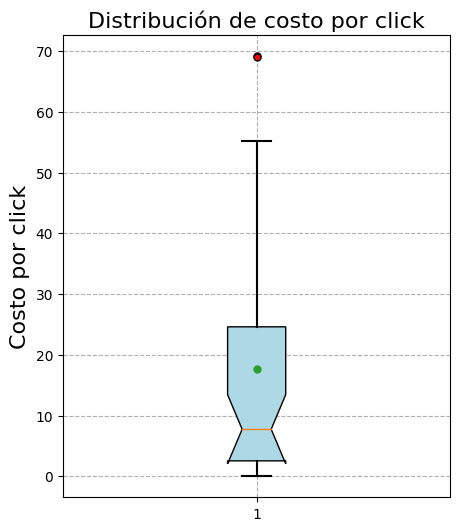

Anuncios con su valor fuera del rango (outliers):
                       nombre_anuncio  costo_por_click_anuncio
31  Test__Ad_Oculto_T106Alta_Mejorado                69.146858
35   Test__Ad_Oculto_T88Alta_Mejorado                69.086667


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'costo_por_click_anuncio'
df_sorted = df_grouped.sort_values(by='costo_por_click_anuncio', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['costo_por_click_anuncio'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de costo por click', fontsize=16)
plt.ylabel('Costo por click', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['costo_por_click_anuncio'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['costo_por_click_anuncio'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['costo_por_click_anuncio'].quantile(0.25)
q3 = df_sorted['costo_por_click_anuncio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más costo_por_click_anuncio por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['costo_por_click_anuncio'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'costo_por_click_anuncio']])

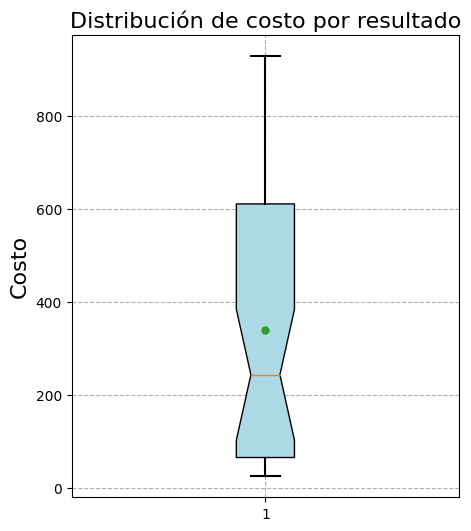

Anuncios con su valor fuera del rango (outliers):
Empty DataFrame
Columns: [nombre_anuncio, costo_por_resultado]
Index: []


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'costo_por_resultado '
df_sorted = df_grouped.sort_values(by='costo_por_resultado', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['costo_por_resultado'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de costo por resultado', fontsize=16)
plt.ylabel('Costo', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['costo_por_resultado '].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['costo_por_resultado '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['costo_por_resultado'].quantile(0.25)
q3 = df_sorted['costo_por_resultado'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más costo_por_resultado  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['costo_por_resultado'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'costo_por_resultado']])

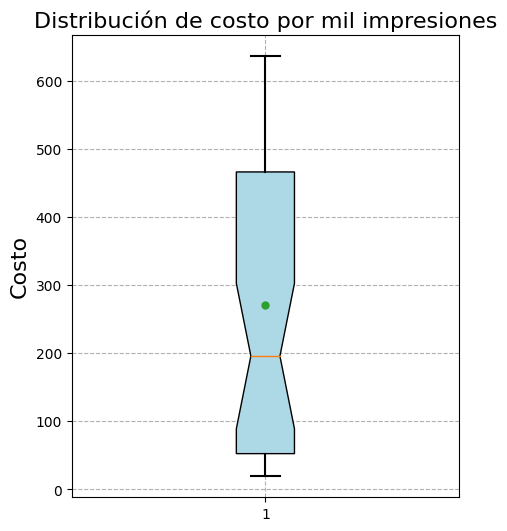

Anuncios con su valor fuera del rango (outliers):
Empty DataFrame
Columns: [nombre_anuncio, costo_por_mil_impresiones]
Index: []


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'costo_por_mil_impresiones '
df_sorted = df_grouped.sort_values(by='costo_por_mil_impresiones', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['costo_por_mil_impresiones'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de costo por mil impresiones', fontsize=16)
plt.ylabel('Costo', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['costo_por_mil_impresiones'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['costo_por_mil_impresiones '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['costo_por_mil_impresiones'].quantile(0.25)
q3 = df_sorted['costo_por_mil_impresiones'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más costo_por_mil_impresiones  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['costo_por_mil_impresiones'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'costo_por_mil_impresiones']])

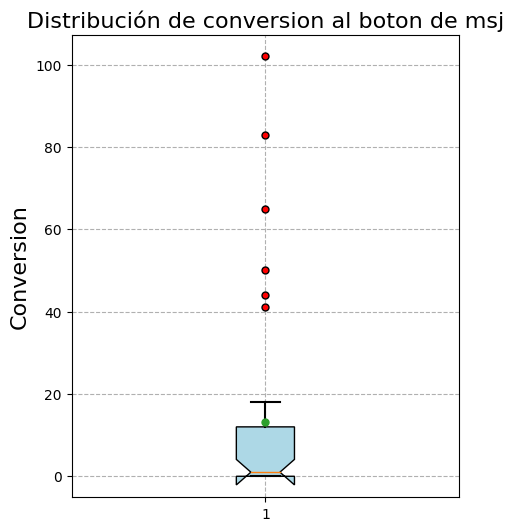

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  conversion_boton_msj
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                 102.0
8                  Test_Ad_Amenidades_Video_Altavista                  83.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante                  65.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante                  50.0
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado                  44.0
28               Test_Ad_Ultimas88_Altavista_Mejorado                  41.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'conversion_boton_msj '
df_sorted = df_grouped.sort_values(by='conversion_boton_msj', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['conversion_boton_msj'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de conversion al boton de msj', fontsize=16)
plt.ylabel('Conversion', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['conversion_boton_msj'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['conversion_boton_msj '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['conversion_boton_msj'].quantile(0.25)
q3 = df_sorted['conversion_boton_msj'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más conversion_boton_msj  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['conversion_boton_msj'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'conversion_boton_msj']])

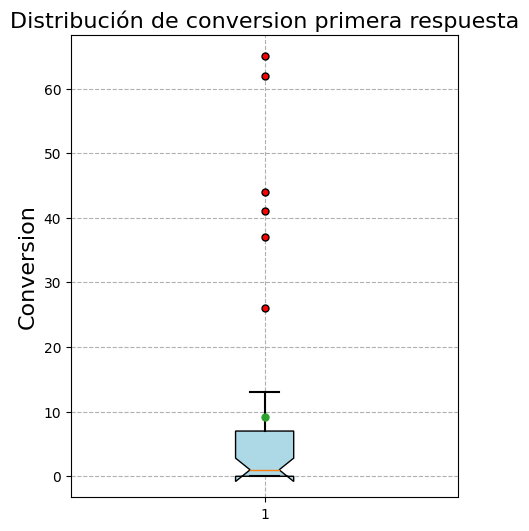

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  conversion_primer_respuesta
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                         65.0
8                  Test_Ad_Amenidades_Video_Altavista                         62.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante                         44.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante                         41.0
28               Test_Ad_Ultimas88_Altavista_Mejorado                         37.0
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado                         26.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'conversion_primer_respuesta '
df_sorted = df_grouped.sort_values(by='conversion_primer_respuesta', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['conversion_primer_respuesta'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de conversion primera respuesta', fontsize=16)
plt.ylabel('Conversion', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['conversion_primer_respuesta'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['conversion_primer_respuesta '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['conversion_primer_respuesta'].quantile(0.25)
q3 = df_sorted['conversion_primer_respuesta'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más conversion_primer_respuesta  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['conversion_primer_respuesta'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'conversion_primer_respuesta']])

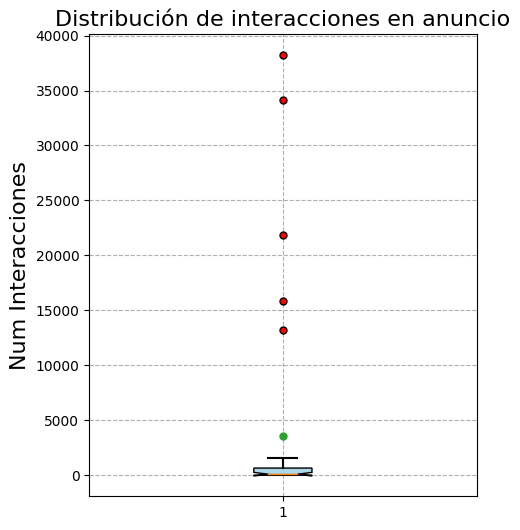

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  interaccion_post
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado           38204.0
27                          Test_Ad_SoloLikesFb_Arqui           34115.0
8                  Test_Ad_Amenidades_Video_Altavista           21878.0
20       Test_Ad_Reco_FacePage_ConsejosChino_Mejorado           15820.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...           13227.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'interaccion_post '
df_sorted = df_grouped.sort_values(by='interaccion_post', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['interaccion_post'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de interacciones en anuncio', fontsize=16)
plt.ylabel('Num Interacciones', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['interaccion_post'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['interaccion_post '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['interaccion_post'].quantile(0.25)
q3 = df_sorted['interaccion_post'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más interaccion_post  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['interaccion_post'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'interaccion_post']])

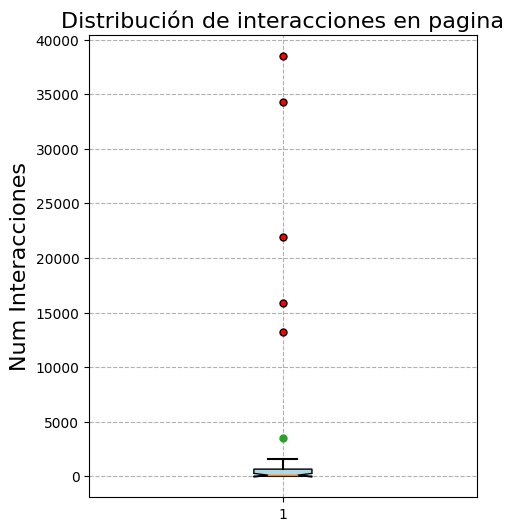

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  interaccion_page
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado           38468.0
27                          Test_Ad_SoloLikesFb_Arqui           34303.0
8                  Test_Ad_Amenidades_Video_Altavista           21879.0
20       Test_Ad_Reco_FacePage_ConsejosChino_Mejorado           15892.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...           13231.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'interaccion_page '
df_sorted = df_grouped.sort_values(by='interaccion_page', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['interaccion_page'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de interacciones en pagina', fontsize=16)
plt.ylabel('Num Interacciones', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['interaccion_page'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['interaccion_page '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['interaccion_page'].quantile(0.25)
q3 = df_sorted['interaccion_page'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más interaccion_page  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['interaccion_page'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'interaccion_page']])

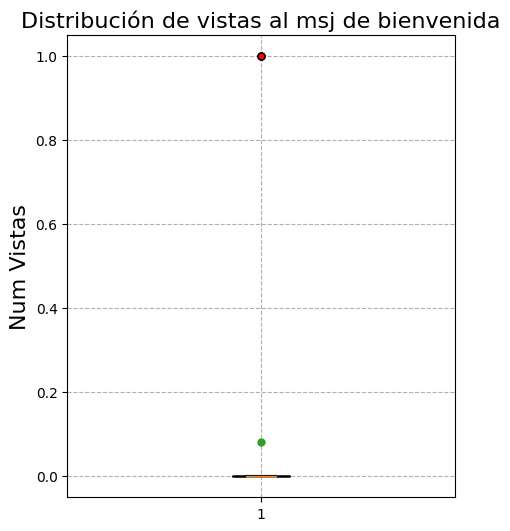

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  vistas_mensaje_bienvenida
7                   Test_AdOculto_Morillo82_NoCompres                        1.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                        1.0
28               Test_Ad_Ultimas88_Altavista_Mejorado                        1.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'vistas_mensaje_bienvenida '
df_sorted = df_grouped.sort_values(by='vistas_mensaje_bienvenida', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['vistas_mensaje_bienvenida'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de vistas al msj de bienvenida', fontsize=16)
plt.ylabel('Num Vistas', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['vistas_mensaje_bienvenida'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['vistas_mensaje_bienvenida '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['vistas_mensaje_bienvenida'].quantile(0.25)
q3 = df_sorted['vistas_mensaje_bienvenida'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más vistas_mensaje_bienvenida  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['vistas_mensaje_bienvenida'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'vistas_mensaje_bienvenida']])

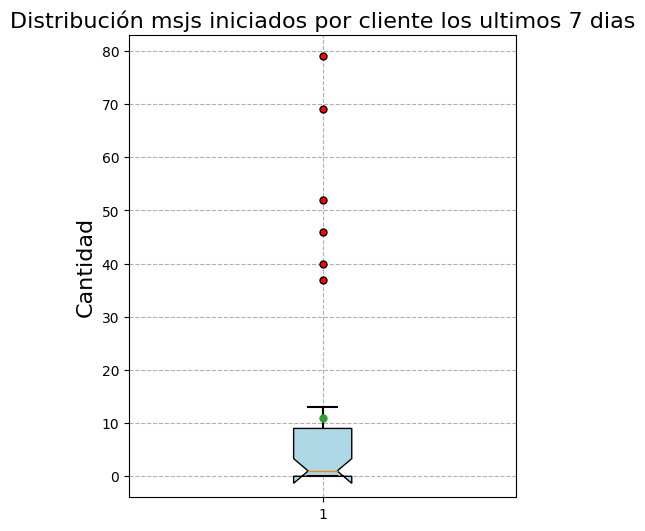

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  msj_iniciado_por_cliente_ultimos_7Dias
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                                    79.0
8                  Test_Ad_Amenidades_Video_Altavista                                    69.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante                                    52.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante                                    46.0
28               Test_Ad_Ultimas88_Altavista_Mejorado                                    40.0
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado                                    37.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'msj_iniciado_por_cliente_ultimos_7Dias '
df_sorted = df_grouped.sort_values(by='msj_iniciado_por_cliente_ultimos_7Dias', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['msj_iniciado_por_cliente_ultimos_7Dias'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución msjs iniciados por cliente los ultimos 7 dias', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['msj_iniciado_por_cliente_ultimos_7Dias'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['msj_iniciado_por_cliente_ultimos_7Dias '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['msj_iniciado_por_cliente_ultimos_7Dias'].quantile(0.25)
q3 = df_sorted['msj_iniciado_por_cliente_ultimos_7Dias'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más msj_iniciado_por_cliente_ultimos_7Dias  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['msj_iniciado_por_cliente_ultimos_7Dias'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'msj_iniciado_por_cliente_ultimos_7Dias']])

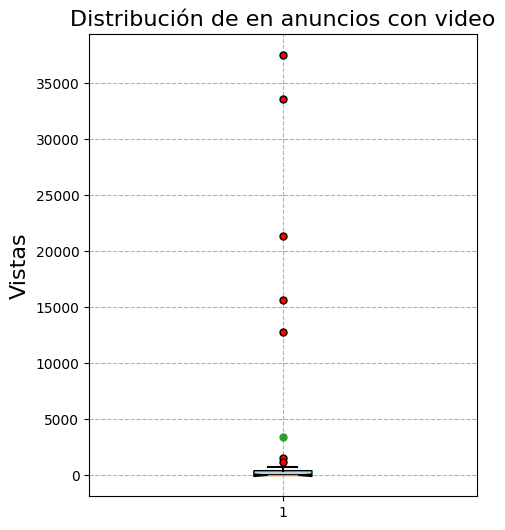

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  vistas_video
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado       37486.0
27                          Test_Ad_SoloLikesFb_Arqui       33607.0
8                  Test_Ad_Amenidades_Video_Altavista       21344.0
20       Test_Ad_Reco_FacePage_ConsejosChino_Mejorado       15649.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...       12831.0
19               Test_Ad_Reco_Arqui_FacePage_Mejorado        1556.0
16                        Test_Ad_LikeFb_AdivinaQuien        1212.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'vistas_video '
df_sorted = df_grouped.sort_values(by='vistas_video', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['vistas_video'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de en anuncios con video', fontsize=16)
plt.ylabel('Vistas', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['vistas_video'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['vistas_video '].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['vistas_video'].quantile(0.25)
q3 = df_sorted['vistas_video'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más vistas_video  por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['vistas_video'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'vistas_video']])

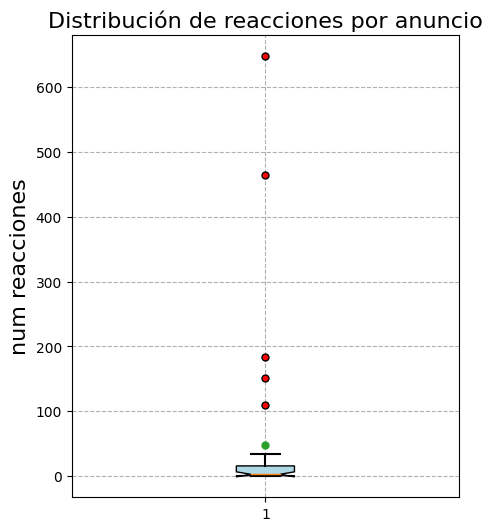

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  reacciones_post
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado            647.0
27                          Test_Ad_SoloLikesFb_Arqui            464.0
8                  Test_Ad_Amenidades_Video_Altavista            183.0
20       Test_Ad_Reco_FacePage_ConsejosChino_Mejorado            152.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...            110.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'reacciones_post'
df_sorted = df_grouped.sort_values(by='reacciones_post', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['reacciones_post'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de reacciones por anuncio', fontsize=16)
plt.ylabel('num reacciones', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['reacciones_post'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['reacciones_post'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['reacciones_post'].quantile(0.25)
q3 = df_sorted['reacciones_post'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más reacciones_post por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['reacciones_post'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'reacciones_post']])

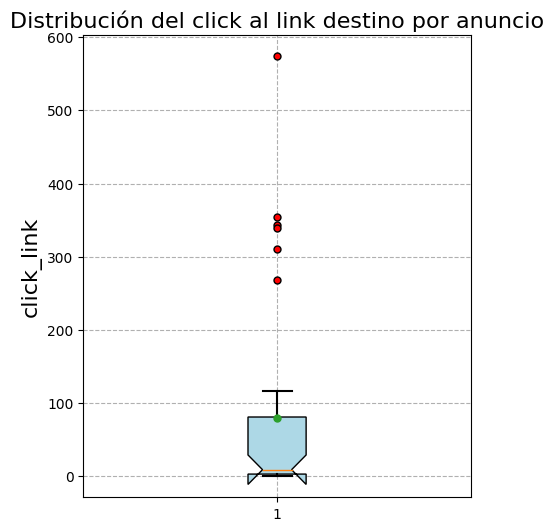

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  click_link
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado       574.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante       354.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante       344.0
8                  Test_Ad_Amenidades_Video_Altavista       339.0
28               Test_Ad_Ultimas88_Altavista_Mejorado       310.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...       268.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'click_link'
df_sorted = df_grouped.sort_values(by='click_link', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['click_link'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución del click al link destino por anuncio', fontsize=16)
plt.ylabel('click_link', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['click_link'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['click_link'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['click_link'].quantile(0.25)
q3 = df_sorted['click_link'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más click_link por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['click_link'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'click_link']])

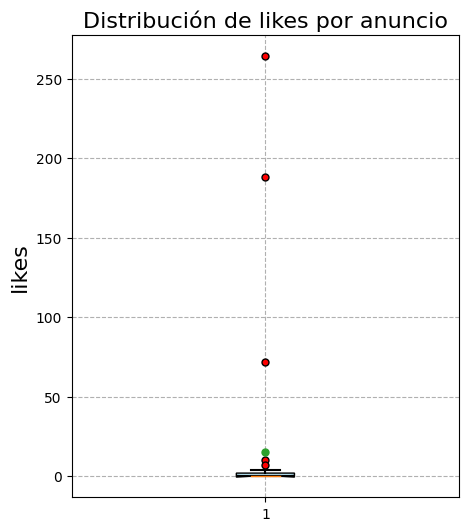

Anuncios con su valor fuera del rango (outliers):
                                  nombre_anuncio   like
21     Test_Ad_Reco_FacePage_Suiza_Face_Mejorado  264.0
27                     Test_Ad_SoloLikesFb_Arqui  188.0
20  Test_Ad_Reco_FacePage_ConsejosChino_Mejorado   72.0
16                   Test_Ad_LikeFb_AdivinaQuien   10.0
19          Test_Ad_Reco_Arqui_FacePage_Mejorado    7.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'like'
df_sorted = df_grouped.sort_values(by='like', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['like'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de likes por anuncio', fontsize=16)
plt.ylabel('likes', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['like'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['like'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['like'].quantile(0.25)
q3 = df_sorted['like'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más like por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['like'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'like']])

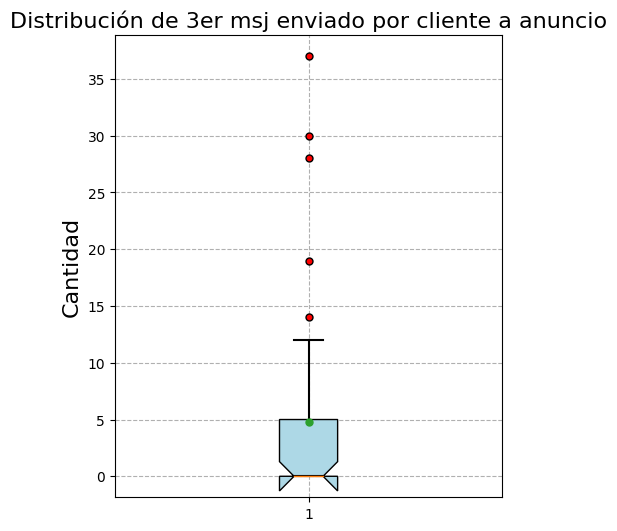

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  3er_msj_cliente
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...             37.0
8                  Test_Ad_Amenidades_Video_Altavista             30.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante             28.0
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado             19.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante             14.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna '3er_msj_cliente'
df_sorted = df_grouped.sort_values(by='3er_msj_cliente', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['3er_msj_cliente'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de 3er msj enviado por cliente a anuncio', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['3er_msj_cliente'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['3er_msj_cliente'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['3er_msj_cliente'].quantile(0.25)
q3 = df_sorted['3er_msj_cliente'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más 3er_msj_cliente por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['3er_msj_cliente'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', '3er_msj_cliente']])

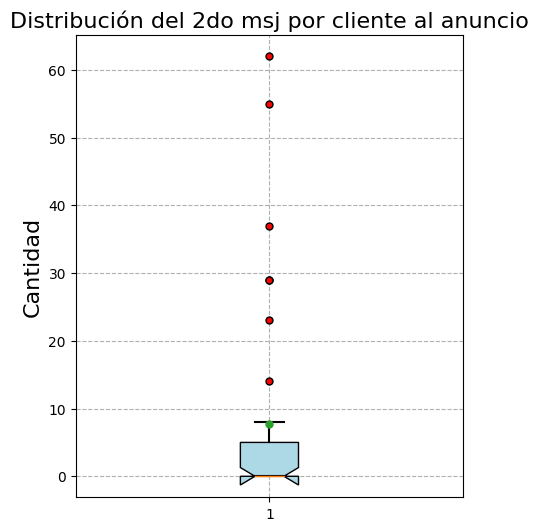

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  2do_msj_cliente
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...             62.0
8                  Test_Ad_Amenidades_Video_Altavista             55.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante             37.0
26  Test_Ad_Sept_Ultimas_Carrusel88Altavista_Mejorado             29.0
28               Test_Ad_Ultimas88_Altavista_Mejorado             29.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante             23.0
34                  Test__Ad_Oculto_T80Alta_NoCompres             14.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna '2do_msj_cliente'
df_sorted = df_grouped.sort_values(by='2do_msj_cliente', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['2do_msj_cliente'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución del 2do msj por cliente al anuncio', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['2do_msj_cliente'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['2do_msj_cliente'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['2do_msj_cliente'].quantile(0.25)
q3 = df_sorted['2do_msj_cliente'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más 2do_msj_cliente por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['2do_msj_cliente'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', '2do_msj_cliente']])

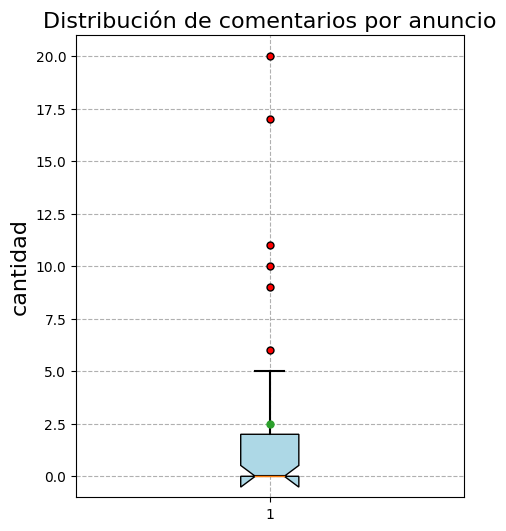

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  comentarios
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado         20.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...         17.0
8                  Test_Ad_Amenidades_Video_Altavista         11.0
27                          Test_Ad_SoloLikesFb_Arqui         10.0
28               Test_Ad_Ultimas88_Altavista_Mejorado          9.0
14  Test_Ad_Img_Ultimas146Morillo_MejoradoSeptDelante          6.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'comentarios'
df_sorted = df_grouped.sort_values(by='comentarios', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['comentarios'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de comentarios por anuncio', fontsize=16)
plt.ylabel('cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['comentarios'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['comentarios'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['comentarios'].quantile(0.25)
q3 = df_sorted['comentarios'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más comentarios por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['comentarios'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'comentarios']])

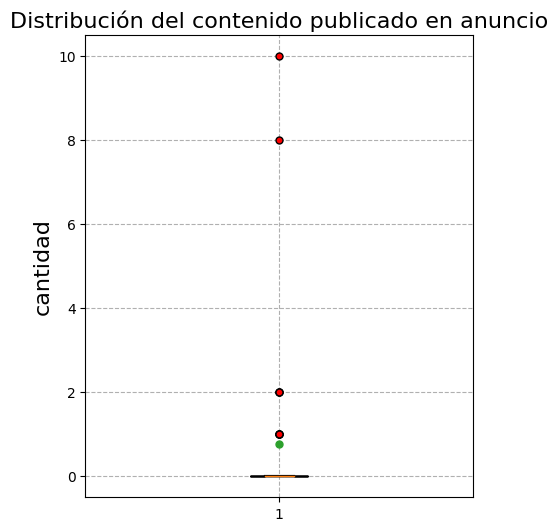

Anuncios con su valor fuera del rango (outliers):
                                       nombre_anuncio  contenido_publicado
21          Test_Ad_Reco_FacePage_Suiza_Face_Mejorado                 10.0
20       Test_Ad_Reco_FacePage_ConsejosChino_Mejorado                  8.0
22                  Test_Ad_Roc2_AntiPsicoInve_Mod102                  2.0
27                          Test_Ad_SoloLikesFb_Arqui                  2.0
0          Test_AdGenMascotas_Mejorado_Sept_EnDelante                  2.0
7                   Test_AdOculto_Morillo82_NoCompres                  1.0
8                  Test_Ad_Amenidades_Video_Altavista                  1.0
4   Test_AdOculto_Morillo106_DifMascotas_MejoradoS...                  1.0
30  Test_Ad_VideoVenta_InfoMod106Morillo_Mejorado_...                  1.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'contenido_publicado'
df_sorted = df_grouped.sort_values(by='contenido_publicado', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['contenido_publicado'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución del contenido publicado en anuncio', fontsize=16)
plt.ylabel('cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['contenido_publicado'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['contenido_publicado'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['contenido_publicado'].quantile(0.25)
q3 = df_sorted['contenido_publicado'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más contenido_publicado por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['contenido_publicado'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'contenido_publicado']])

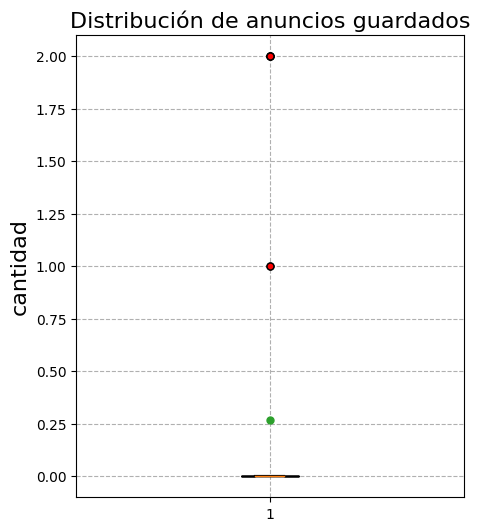

Anuncios con su valor fuera del rango (outliers):
                                  nombre_anuncio  contenido_guardado
20  Test_Ad_Reco_FacePage_ConsejosChino_Mejorado                 2.0
27                     Test_Ad_SoloLikesFb_Arqui                 2.0
21     Test_Ad_Reco_FacePage_Suiza_Face_Mejorado                 2.0
22             Test_Ad_Roc2_AntiPsicoInve_Mod102                 2.0
34             Test__Ad_Oculto_T80Alta_NoCompres                 1.0
16                   Test_Ad_LikeFb_AdivinaQuien                 1.0


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el csv para analizar
df = pd.read_csv("/dbfs/mnt/processed/Ads_General_Por_Dia/anuncios_insights_general_por_dia_limpiado.csv")

# Agrupar los anuncios por nombre y sumar las interacciones
df_grouped = df.groupby('nombre_anuncio', as_index=False).sum(numeric_only=True)

# Ordenar los anuncios de mayor a menor por la columna 'contenido_guardado'
df_sorted = df_grouped.sort_values(by='contenido_guardado', ascending=False)

# Configurar las propiedades de los fliers (valores atípicos)
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# Crear el gráfico a detalle
plt.figure(figsize=(5,6))  # Ajustar el tamaño del gráfico

# Creando boxplot detallado con los datos agrupados
box = plt.boxplot(df_sorted['contenido_guardado'], patch_artist=True, notch=True, vert=True, showmeans=True, flierprops=flierprops)

# Personalizar colores de la caja
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
# Personalizar colores de los bigotes y medianas
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
# Gorras
for cap in box['caps']:
    cap.set(color='black', linewidth=1.5)
# Mediana
for mean in box['means']:
    mean.set(marker='o', color='green', markersize=5)

# Etiquetas y título
plt.title('Distribución de anuncios guardados', fontsize=16)
plt.ylabel('cantidad', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)

# Ajustar el rango del eje 'Y' y los ticks
#plt.ylim(0, df_grouped['contenido_guardado'].max()+500)  # Ajustar el límite superior del eje Y
#plt.yticks(range(0, int(df_grouped['contenido_guardado'].max())+1000, 1000))  # Configurar los ticks de 1000 en 1000

# Mostrar gráfico
plt.show()

# Identificar límites del boxplot
q1 = df_sorted['contenido_guardado'].quantile(0.25)
q3 = df_sorted['contenido_guardado'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar anuncios con más contenido_guardado por encima del límite superior
anuncios_outliers = df_sorted[df_sorted['contenido_guardado'] > upper_bound]

# Mostrar los nombres de los anuncios que son outliers
print("Anuncios con su valor fuera del rango (outliers):")
print(anuncios_outliers[['nombre_anuncio', 'contenido_guardado']])